In [783]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier # Import k-Nearest Neighbours Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.neural_network import MLPClassifier # Import Multilayer Perceptron Classifier

<b>1. Decision Tree Classification example</b>

<b>Import data from csv file.</b>

In [11]:
df = pd.read_csv("igrzyska_list_8.csv")

# remove columns containing old indices
del df['Unnamed: 0']
del df['Unnamed: 0.1']

df.head()

,URODZONY,PLEC,KLM6,woj,q9,q10,q11,q12,q13,q14,...,waga,error,decade,economical_opinion,politicians_opinion,muslims_opinion,year_to_datetime,leap_year,full_name,age_group
0,1940,2,1,11,2,4,NaN,13,8.0,1,...,0.722004,-4.0,40,4.000000,9.46,1.555556,1940-01-01,True,Hannah Cameron,old
1,1943,1,3,11,8,4,NaN,13,3.0,1,...,0.686766,-1.0,40,3.333333,5.68,3.555556,1943-01-01,False,Tammy Robinson,old
2,1936,1,3,11,8,4,NaN,13,3.0,1,...,0.686766,-1.0,30,2.333333,5.50,3.000000,1936-01-01,True,Jennifer Chavez,very old
3,1948,1,3,11,4,4,NaN,13,6.0,1,...,1.604806,3.0,40,4.000000,9.04,4.000000,1948-01-01,True,Mario Allen,old
4,1994,2,1,10,3,4,NaN,11,11.0,2,...,1.316088,-1.0,90,3.000000,7.48,3.000000,1994-01-01,False,Cindy Quinn,very young


<b>Split dataset to train set and test set.</b>

In [821]:
# q83 column - should we care about our health?
X = df [['q83', 'economical_opinion', 'politicians_opinion', 'muslims_opinion']].round()

y = df['PLEC']

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<b>Create Decision Tree classifier, train it on the train set and predict the age group for test set and measure the accuracy of the trained model.</b><br><br>
<font size="5">Accuracy (higher -> higher % of correct predicitions) = <br>
= $\frac{TP + TN}{TP + TN + FP + FN}$</font><br><br>
<font size="5">F-measure (higher -> less FN <b>and</b> FP) = <br>
=  $\frac{2}{\frac{TP + FN + TP + FP}{TP}}$ =
$\frac{2TP}{2TP + FN + FP}$</font><br><br>
<font size="5">Precision (higher -> less false positives) = <br>
= $\frac{TP}{TP + FP}$</font>

In [887]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4) 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, F-measure and Precision
print(f"Accuracy: \t{metrics.accuracy_score(y_test, y_pred)}",
      f"\nF-measure: \t{metrics.f1_score(y_test, y_pred)}",
      f"\nPrecision: \t{metrics.precision_score(y_test, y_pred)}")

Accuracy: 	0.6111111111111112 
F-measure: 	0.40425531914893614 
Precision: 	0.48717948717948717


<b>Visualize decision tree</b>

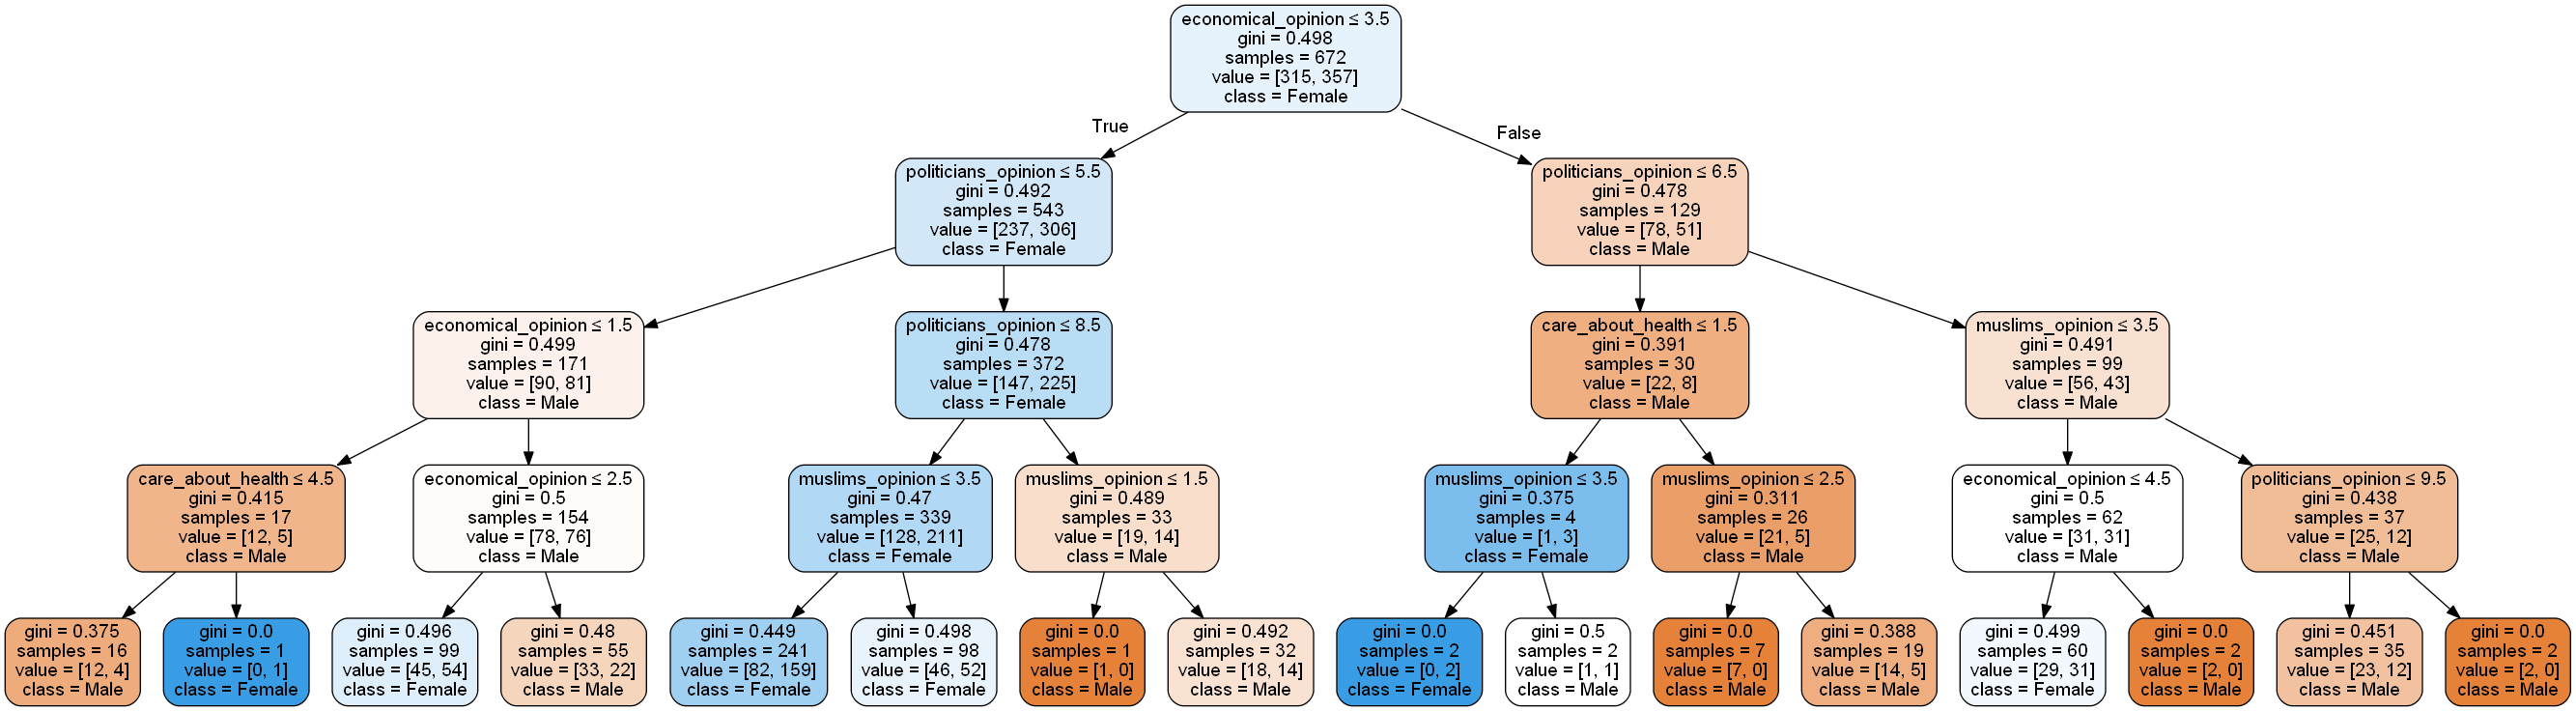

In [888]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = ['care_about_health', 'economical_opinion', 'politicians_opinion', 'muslims_opinion'],
                class_names=['Male','Female'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('olympic_games_gender.png')
Image(graph.create_png())

<b>2. k-Nearest Neighbours (k-NN), Naive Bayes (NB) and Multilayer Perceptron (MLP) classifiers example usage.</b>

In [883]:
# === k-Nearest Neighbours ===
# Create k-Nearest Neighbours classifer object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')

# Train k-Nearest Neighbours Classifer
knn = knn.fit(X_train,y_train)

#Predict the response for test dataset
knn_pred = knn.predict(X_test)

# Model Accuracy, F-measure and Precision
print("=== k-Nearest Neighbours Classifier metrics ===",
      f"\nAccuracy: \t{metrics.accuracy_score(y_test, knn_pred)}",
      f"\nF-measure: \t{metrics.f1_score(y_test, knn_pred)}",
      f"\nPrecision: \t{metrics.precision_score(y_test, knn_pred)}")

# === Naive Bayes ===
# Create Naive Bayes classifer object
nb = GaussianNB()

# Train Naive Bayes Classifer
nb = nb.fit(X_train,y_train)

#Predict the response for test dataset
nb_pred = nb.predict(X_test)

# Model Accuracy, F-measure and Precision
print("\n=== Naive Bayes Classifier metrics ===",
      f"\nAccuracy: \t{metrics.accuracy_score(y_test, nb_pred)}",
      f"\nF-measure: \t{metrics.f1_score(y_test, nb_pred)}",
      f"\nPrecision: \t{metrics.precision_score(y_test, nb_pred)}")

# === Multilayer Preceptron ===
# Create Multilayer Preceptro classifer object
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10),
                    max_iter=500,
                    alpha=0.001,
                    learning_rate_init=0.01,
                    solver='adam',
                    verbose=False,
                    random_state=21,
                    tol=0.000000001)

# Train Multilayer Preceptro Classifer
mlp = mlp.fit(X_train,y_train)

#Predict the response for test dataset
mlp_pred = mlp.predict(X_test)

# Model Accuracy, F-measure and Precision
print("\n=== Multilayer Preceptron Classifier metrics ===",
      f"\nAccuracy: \t{metrics.accuracy_score(y_test, mlp_pred)}",
      f"\nF-measure: \t{metrics.f1_score(y_test, mlp_pred)}",
      f"\nPrecision: \t{metrics.precision_score(y_test, mlp_pred)}")

results_df = pd.DataFrame(data=[[metrics.accuracy_score(y_test, knn_pred),
                                 metrics.accuracy_score(y_test, nb_pred),
                                 metrics.accuracy_score(y_test, mlp_pred)],
                                [metrics.f1_score(y_test, knn_pred),
                                 metrics.f1_score(y_test, nb_pred),
                                 metrics.f1_score(y_test, mlp_pred)],
                                [metrics.precision_score(y_test, knn_pred),
                                 metrics.precision_score(y_test, nb_pred),
                                 metrics.precision_score(y_test, mlp_pred)]],
                         index=['Accuracy', 'F-measure', 'Precision'],
                         columns=['k-NN', 'NB', 'MLP'])
results_df.round(3)

=== k-Nearest Neighbours Classifier metrics === 
Accuracy: 	0.5902777777777778 
F-measure: 	0.47321428571428575 
Precision: 	0.4649122807017544

=== Naive Bayes Classifier metrics === 
Accuracy: 	0.5381944444444444 
F-measure: 	0.4615384615384615 
Precision: 	0.41605839416058393

=== Multilayer Preceptron Classifier metrics === 
Accuracy: 	0.6111111111111112 
F-measure: 	0.4615384615384615 
Precision: 	0.4897959183673469


,k-NN,NB,MLP
Accuracy,0.590,0.538,0.611
F-measure,0.473,0.462,0.462
Precision,0.465,0.416,0.490
